In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

In [6]:
def load_data_from_file(filename = ''): #add link to your data dir
  data = np.genfromtxt(filename, delimiter=',', skip_header=1)
  feature_X = data[:, :3]
  sale_Y = data[:, 3]
  feature_X = np.insert(feature_X, 0, 1, axis=1)
  return feature_X, sale_Y

In [7]:
features_X , _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [8]:
_ , sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [ ]:
"""
n: size of ind
m: size of pop
n_generations: num of generations
losses: store loss value to plot

---
Function:
- compute_loss(ind): compute loss value of individual
- compute_fitness(ind): compute fitness value of individual
- create_individual()
- crossover(ind1, ind2, crossover_rate = 0.9)
- mutate(ind, mutation_rate = 0.05)
- selection(sorted_old_population)
- create_new_population(old_population, elitism=2, gen=1)
"""

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [128]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value(bound) for _ in range(n)]
    return individual

In [129]:
individual = create_individual()
print(individual)

[1.0685289424555677, -3.9438614434267993, -4.58363458825274, 3.0917847453819416]


In [18]:
features_X, sales_Y = load_data_from_file()

In [30]:
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 0
  fitness_value = 1 / (loss + 1)
  return fitness_value

In [31]:
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(f"{fitness_score:.6e}:")

1.018599e-06:


In [130]:
def crossover(ind1, ind2, crossover_rate = 0.9):
	ind1_new = ind1.copy()
	ind2_new = ind2.copy()

	for i in range(len(ind1)):
		if random.random() < crossover_rate:
			ind1_new[i], ind2_new[i] = ind2[i], ind1[i]

	return ind1_new, ind2_new


In [55]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [116]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [57]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [61]:
def initialize_population ( m ):
  population = [create_individual() for _ in range(m)]
  return population

In [74]:
population = initialize_population(100)
print(population)

[[3.5714779295496104, 4.8210734477755945, -3.2806633775603897, 1.8233981078725616], [-0.9882447725469667, -0.13648133670960405, 3.84741017518612, 0.9341709276620289], [1.80088279397099, 3.110170687791191, 4.181124205473369, 0.8243875499843352], [0.10275093722325401, -2.4724319399899652, 0.4245577694556557, 3.7058584583818828], [-0.6447824663029946, 0.8148652519482402, -0.5659170773251931, -1.9642959140747518], [-0.7277900611483172, -1.8382143033566942, -4.270296525043729, -4.731966026893898], [-3.930816540368091, 3.9399376497972813, 4.254358371298132, 3.955035391324941], [-1.5837884829028637, 1.8670974941501894, 2.5469092923490404, -1.2161511161930818], [-0.9781003050003756, 0.15389239508938246, -2.458512507698746, 1.2875346505057141], [-3.1293694708497877, -1.4216264031796957, -3.9192941286476755, 2.58357265194594], [-2.1335542949829547, -1.173201429205485, -1.3152357033429816, 4.582761325882], [1.2256567868749002, 1.9131770442687888, 4.362639175177957, 3.3121492195980693], [0.7179826

In [127]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [134]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])

    new_population = []

    # Selection, Crossover, and Mutation
    while len(new_population) < m - elitism:
        p1 = selection(sorted_population, m)
        p2 = selection(sorted_population, m)
        c1, c2 = crossover(p1, p2)

        # Debugging

        c1 = mutate(c1)
        c2 = mutate(c2)

        # Debugging
        new_population.append(c1)
        new_population.append(c2)

    # Add elitism individuals
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])


In [82]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [135]:
def run_ga():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initialize_population(m)
  losses_list = []
  for i in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
  return losses_list


Best loss: 1450.7605119929055 with chromosome:  [2.9143019205678, 0.12070845661918739, 1.7035785529048186, -0.4887696439560707]
Best loss: 1049.4120466955076 with chromosome:  [2.5662906669530248, 0.2491301192751394, -0.3263392229669093, -1.0059471018128308]
Best loss: 806.771903653979 with chromosome:  [6.133271516741337, 0.21056563592199762, 0.7226011379483788, -1.2573501111061336]
Best loss: 781.1840654830437 with chromosome:  [-3.3521847035601793, 0.20958256166984324, -1.2819124080773692, 0.8843407698823336]
Best loss: 245.21128178490142 with chromosome:  [2.9143019205678, 0.12070845661918739, 0.7753391135690435, -0.4887696439560707]
Best loss: 245.21128178490142 with chromosome:  [2.9143019205678, 0.12070845661918739, 0.7753391135690435, -0.4887696439560707]
Best loss: 46.4535600953953 with chromosome:  [2.203165076514668, 0.12070845661918739, -0.054884572056090875, -0.03762092130399464]
Best loss: 46.4535600953953 with chromosome:  [2.203165076514668, 0.12070845661918739, -0.0548

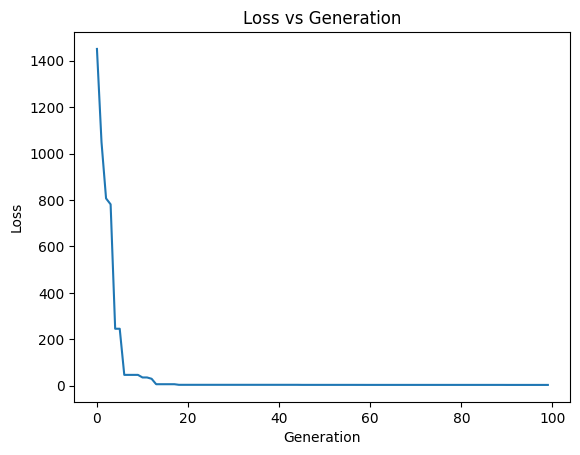

In [136]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

  plt.plot(losses_list)
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.title('Loss vs Generation')
  plt.show()

losses_list = run_ga()
visualize_loss(losses_list)

[2.116306872997332, 0.12555006034104554, -0.4049137979112096, 0.3667832653243961]


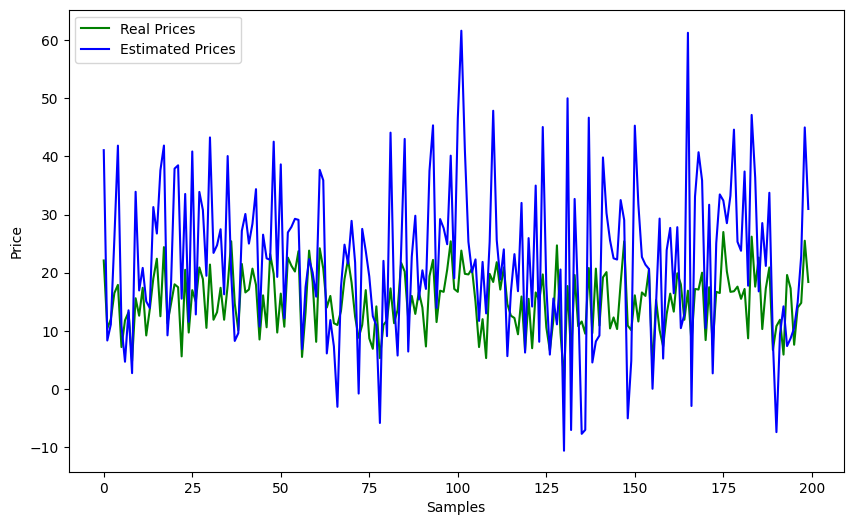

In [137]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      estimated_price = sum(c*x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[2.116306872997332, 0.12555006034104554, -0.4049137979112096, 0.3667832653243961]


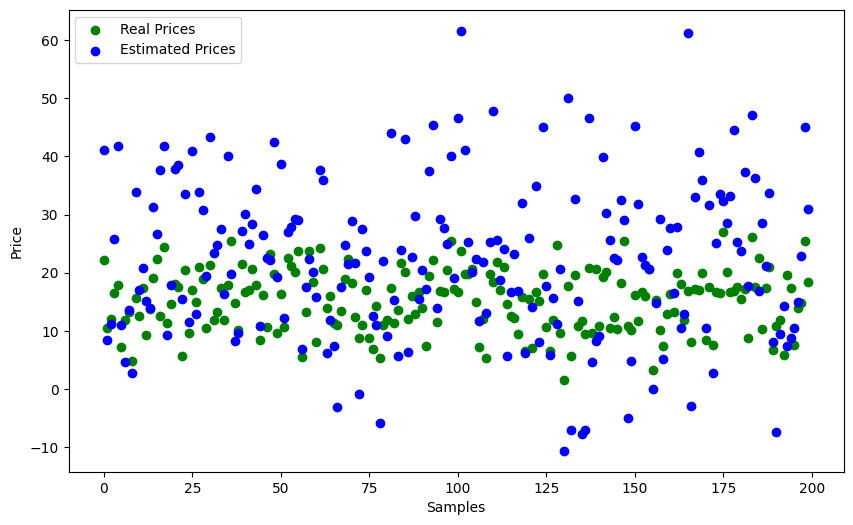

In [138]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()
